# Libraries

In [1]:
import pandas as pd
import numpy as np

## Reading the data in Excel Sheets into Pandas DataFrame 

In [5]:
data1=pd.read_excel("datasets/All_patients_clinical_data- with FAB stages.xlsx")
data2= pd.read_excel("datasets/All_patients_marker_genes.xlsx",sheet_name = None)
data3 = pd.read_excel("datasets/All_patients_marker_genes_Bcells.xlsx",sheet_name = None)

## Exploring the Data Frame data1


In [6]:
data1.shape

(46, 20)

In [7]:
data1.columns

Index(['Sample ID', 'Age', 'Age group', 'Gender',
       'Date of sample collection relative to diagnosis', 'FAB subtype',
       'FAB subtype (stages)', 'Mutation', 'Unnamed: 8', 'Unnamed: 9',
       'Therapeutic regimen', 'Abbreviation',
       'Classification/ category https://seer.cancer.gov/seertools/seerrx/',
       'Subcategory', 'Line of therapy/ FDA approved for AML and / or CML',
       'Treatment group', 'Single-cell type', 'Cell counts',
       'Post-treatment samples collection information', 'Transplantation'],
      dtype='object')

In [8]:
cols= data1.columns.tolist()
cols.append('mutations')
cols.append('mutations_order')
data1_lst=[]
for i in range(len(data1)):
    dx= data1.loc[i].copy(deep=True)
    mutation=dx['Mutation']#.split(sep=',')
    if type(mutation)== str:
        mutation=dx['Mutation'].split(sep=',')
        ctr=0

        lst=[]
        for x in mutation:
            lst1=dx.values.tolist()
            lst1.append(x)
            lst1.append(ctr)
            lst.append(lst1)
            ctr+=1
    else:
        #mutation=dx['Mutation'].split(sep=',')
        ctr=0

        lst=[]
        #for x in mutation:
        lst1=dx.values.tolist()
        lst1.append(np.NaN)
        lst1.append(np.NaN)
        lst.append(lst1)
        

    df=pd.DataFrame(lst,columns=cols)
    data1_lst.append(df)
data1v1=pd.concat(data1_lst,axis=0, ignore_index=True)

In [9]:
data1v1

,Sample ID,Age,Age group,Gender,Date of sample collection relative to diagnosis,FAB subtype,FAB subtype (stages),Mutation,Unnamed: 8,Unnamed: 9,...,Classification/ category https://seer.cancer.gov/seertools/seerrx/,Subcategory,Line of therapy/ FDA approved for AML and / or CML,Treatment group,Single-cell type,Cell counts,Post-treatment samples collection information,Transplantation,mutations,mutations_order
0,P01,19,y,F,2018-04-30 00:00:00,M2,Myeloblastic leukemia - M2: Maturation of the ...,"WT1,TP53",NaN,NaN,...,NaN,NaN,NaN,NaN,II,7065,NaN,NaN,WT1,0.0
1,P01,19,y,F,2018-04-30 00:00:00,M2,Myeloblastic leukemia - M2: Maturation of the ...,"WT1,TP53",NaN,NaN,...,NaN,NaN,NaN,NaN,II,7065,NaN,NaN,TP53,1.0
2,P02,66,o,M,2017-09-11 00:00:00,M1,Myeloblastic leukemia,NaN,NaN,NaN,...,Chemotherapy,NaN,NaN,NaN,I,9222,NaN,NaN,NaN,NaN
3,P03,40,y,M,2018-09-07 00:00:00,M2,Myeloblastic leukemia - M2: Maturation of the ...,NRAS,NaN,NaN,...,1. Idarubicin anthracycline category of antitu...,Antitumor antibiotics,FDA approved uses on acute lymphocytic and no...,IA,I,6372,NaN,NaN,NRAS,0.0
4,P04,56,o,F,2018-08-27 00:00:00,M4,Myelomonocytic leukemia - M4: In this stage of...,"WT1,DNMT3A,TET2,PTPN11",NaN,NaN,...,2.Cytarabine,Antimetabolites/ DNA damaging,cytarabine (1st for AML),IA_DAC/DAC,I,3076(Pre)/9446(Post),"clollected before the 3rd regimen, partial re...",NaN,WT1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,P20-Post,29,y,M,2017-09-19 00:00:00,M5,Monocytic leukemia - M5,CEBPA,NaN,NaN,...,NaN,NaN,NaN,IA_DAC/DAC,II,6494(Pre)/5978(Post),"clollected before the 6th regimen, relapse",NaN,CEBPA,0.0
129,P-extra1-Post,50,o,M,4/14/20,M5,Monocytic leukemia - M5,"FLT3-ITD,TET2",NaN,NaN,...,NaN,NaN,NaN,IA,NaN,1518(Pre)/5425(Post),"clollected before the 2rd regimen, remission",NaN,FLT3-ITD,0.0
130,P-extra1-Post,50,o,M,4/14/20,M5,Monocytic leukemia - M5,"FLT3-ITD,TET2",NaN,NaN,...,NaN,NaN,NaN,IA,NaN,1518(Pre)/5425(Post),"clollected before the 2rd regimen, remission",NaN,TET2,1.0
131,P-extra2-Post,66,o,F,4/14/20,M2,Myeloblastic leukemia - M2: Maturation of the ...,"IDH2, DNMT3A",NaN,NaN,...,NaN,NaN,NaN,IA_DAC/DAC,NaN,1182(Pre)/2243(Post),"clollected after the 1st regimen, remission",NaN,IDH2,0.0


<AxesSubplot:>

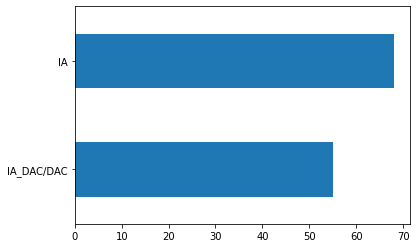

In [22]:
data1v1['Treatment group'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

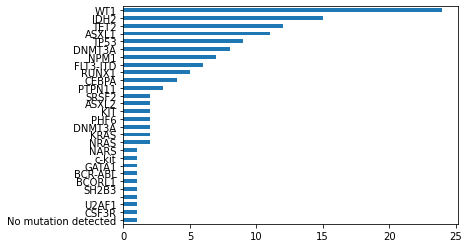

In [23]:
data1v1['mutations'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

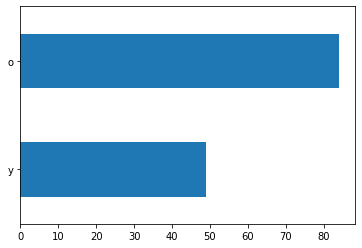

In [24]:
data1v1['Age group'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

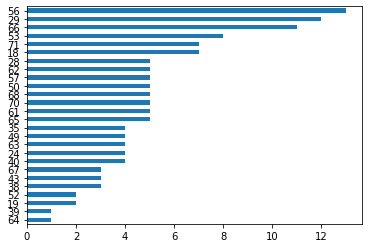

In [25]:
data1v1['Age'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

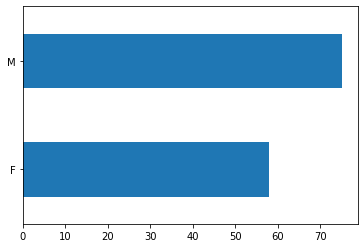

In [26]:
data1v1['Gender'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

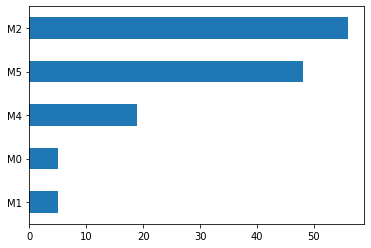

In [27]:
data1v1['FAB subtype'].value_counts().sort_values().plot(kind = 'barh')

## Processing the Dataframe daa3

In [10]:
data3_lst = []
for x in data3.keys():
    data3_lst.append(data3[x])

data3V1 = pd.concat(data3_lst,axis=0, ignore_index=True)


In [11]:
data3V1.rename(columns={"patient ID": "Sample ID"},inplace=True)

In [12]:
data3V1['Sample ID'].unique()

array(['P01', 'P03', 'P05', 'P06', 'P07', 'P10', 'P11', 'P13', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24',
       'P25', 'P27', 'P28', 'P30', 'P31', 'P32', 'P34', 'P35', 'P37',
       'P38', 'P39', 'P40', 'P-extra2', 'P04-Post'], dtype=object)

## Exploring the Data Frame Data2 which is read as an ordered dictionary of multile dataframes representing each sheet in the gene marker excel sheet

In [4]:
data2.keys()

dict_keys(['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40', 'N01', 'N02', 'N03', 'P-extra1', 'P-extra2', 'P04-Post', 'P20-Post', 'P-extra1-Post', 'P-extra2-Post'])

## Creating a single dataframe by appending all the dataframes in the Ordered Dictionary data2

In [5]:
ctr=0
df_list=[]
for x in data2.keys():
    tdf=data2[x]
    tdf['Sample ID']=x
    df_list.append(tdf)

data2_v1 = pd.concat(df_list, axis=0, ignore_index=True)

In [6]:
data2_v1

,Unnamed: 0,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene,Unnamed: 8,cell type,Sample ID,element
0,MYC,2.694477e-52,0.577107,0.343,0.192,3.905914e-48,1,MYC,NaN,AML progenitor cell_nonspecificity,P01,NaN
1,GYPC,2.494695e-44,0.455651,0.436,0.288,3.616310e-40,1,GYPC,NaN,NaN,P01,NaN
2,GAS5,3.485452e-99,0.392348,0.900,0.773,5.052511e-95,1,GAS5,NaN,NaN,P01,NaN
3,SMIM24,3.220443e-24,0.353415,0.374,0.270,4.668355e-20,1,SMIM24,NaN,NaN,P01,NaN
4,SNHG8,1.168819e-60,0.346406,0.778,0.645,1.694320e-56,1,SNHG8,NaN,NaN,P01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
37074,TMED10,2.740085e-03,0.355618,0.275,0.110,1.000000e+00,14,TMED10,NaN,NaN,P-extra2-Post,NaN
37075,RPN2,3.375320e-03,0.352146,0.275,0.113,1.000000e+00,14,RPN2,NaN,NaN,P-extra2-Post,NaN
37076,ZNF706,1.704009e-03,0.343940,0.375,0.162,1.000000e+00,14,ZNF706,NaN,NaN,P-extra2-Post,NaN
37077,KRTCAP2,1.048265e-03,0.312033,0.300,0.112,1.000000e+00,14,KRTCAP2,NaN,NaN,P-extra2-Post,NaN


## EDA: Checking the percent of missing values in the dataframe data2_v1

In [7]:
#data2_v1.isna()/data2_v1.shape[0]
((data2_v1.isnull() | data2_v1.isna()).sum() * 100 / data2_v1.index.size).round(2)

Unnamed: 0      0.00
p_val           0.00
avg_logFC       0.00
pct.1           0.00
pct.2           0.00
p_val_adj       3.44
cluster         0.00
gene            0.00
Unnamed: 8    100.00
cell type      98.85
Sample ID       0.00
element        96.56
dtype: float64

In [8]:
data2_v1.columns

Index(['Unnamed: 0', 'p_val', 'avg_logFC', 'pct.1', 'pct.2', 'p_val_adj',
       'cluster', 'gene', 'Unnamed: 8', 'cell type', 'Sample ID', 'element'],
      dtype='object')

## Droping the column 'Unnamed: 0' because it's a duplicate of column 'gene' 

## Dropping the column 'Unnamed: 8' because it has 100% missing values

In [9]:
data2_v2= data2_v1.drop(['Unnamed: 0','Unnamed: 8'], axis=1)

In [10]:
#Exploring the different gene values for patient 'P04'
data2_v2.loc[data2_v2['Sample ID']=='P04'].gene.values

array(['SPINK2', 'CD74', 'IGKC', 'SOX4', 'PRDX1', 'HLA-DRA', 'SMIM24',
       'CLEC2B', 'FAM30A', 'PSMB1', 'STMN1', 'S100A10', 'LGALS1', 'CD99',
       'RP11-234A1.1', 'ATP5G2', 'HLA-DPA1', 'HLA-DRB1', 'RP11-386I14.4',
       'PSME1', 'IFITM3', 'RPL6', 'NPM1', 'SELL', 'SNRPD1', 'ATP6V1G1',
       'MRPL33', 'ELANE', 'CTSG', 'DEFA4', 'AZU1', 'PRTN3', 'RNASE3',
       'CST7', 'SRGN', 'MPO', 'MS4A3', 'RNASE2', 'BPI', 'SLPI', 'S100P',
       'CEACAM8', 'CD24', 'RP11-84C10.2', 'LYZ', 'CSTA', 'CITED2', 'NKG7',
       'MNDA', 'GCA', 'TKT', 'TSPO', 'NUCB2', 'ALOX5AP', 'CAT', 'HLA-C',
       'S100A8', 'S100A9', 'HSP90B1', 'TMEM123', 'HLA-A', 'PCNA', 'HCST',
       'NDUFB9', 'SERPINB1', 'CD63', 'GNAS', 'PCBP1', 'S100A11', 'TMBIM6',
       'PSMB7', 'H2AFV', 'GLRX', 'PLAC8', 'NPC2', 'MGST1', 'PCBP2',
       'HLA-B', 'OAZ1', 'SSR4', 'COX8A', 'ACTB', 'IFI6', 'ACTG1', 'YBX1',
       'GNLY', 'CCL5', 'NKG7', 'HOPX', 'CD52', 'SNRPB2', 'PSMA3',
       'IFITM2', 'ATP6V0E1', 'MRPL51', 'CA1', 'AHSP', 'HBB', 

## Performing a left join on dataframe data2_v2 with dataframe data1 over column 'Sample ID' to get a single table

In [11]:
data_joined=data2_v2.merge(data1,on='Sample ID', how='left')

In [13]:
data_joined.loc[data_joined['Sample ID']=='P05']

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene,cell type,Sample ID,element,Age,Gender,Date of sample collection relative to diagnosis,FAB subtype,Mutation,Therapeutic regimen,Single-cell type,Cell counts,Post-treatment samples collection information,Transplantation
1158,6.026434e-66,0.393173,0.854,0.720,9.735705e-62,1,CFD,AML progenitor cell_nonspecificity,P05,NaN,52.0,M,2018-08-22 00:00:00,M2,"IDH2,NPM1","IA, IA",I,6886,NaN,NaN
1159,4.839226e-12,0.331679,0.306,0.223,7.817770e-08,1,FTO,NaN,P05,NaN,52.0,M,2018-08-22 00:00:00,M2,"IDH2,NPM1","IA, IA",I,6886,NaN,NaN
1160,1.867168e-17,0.295901,0.524,0.426,3.016409e-13,1,SOX4,NaN,P05,NaN,52.0,M,2018-08-22 00:00:00,M2,"IDH2,NPM1","IA, IA",I,6886,NaN,NaN
1161,2.346815e-11,0.293861,0.359,0.276,3.791280e-07,1,C1orf228,NaN,P05,NaN,52.0,M,2018-08-22 00:00:00,M2,"IDH2,NPM1","IA, IA",I,6886,NaN,NaN
1162,6.445539e-16,0.290449,0.512,0.422,1.041277e-11,1,RPS4Y1,NaN,P05,NaN,52.0,M,2018-08-22 00:00:00,M2,"IDH2,NPM1","IA, IA",I,6886,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,9.749137e-03,0.474942,0.286,0.131,1.000000e+00,6,RPN2,NaN,P05,NaN,52.0,M,2018-08-22 00:00:00,M2,"IDH2,NPM1","IA, IA",I,6886,NaN,NaN
1535,6.051245e-04,0.458126,0.286,0.099,1.000000e+00,6,ARF1,NaN,P05,NaN,52.0,M,2018-08-22 00:00:00,M2,"IDH2,NPM1","IA, IA",I,6886,NaN,NaN
1536,2.031960e-03,0.451090,0.714,0.441,1.000000e+00,6,TMA7,NaN,P05,NaN,52.0,M,2018-08-22 00:00:00,M2,"IDH2,NPM1","IA, IA",I,6886,NaN,NaN
1537,9.394707e-03,0.437682,0.286,0.130,1.000000e+00,6,RPL22L1,NaN,P05,NaN,52.0,M,2018-08-22 00:00:00,M2,"IDH2,NPM1","IA, IA",I,6886,NaN,NaN


In [38]:
#Identifying the amount of missing values in each column for EDA
((data_joined.isnull() | data_joined.isna()).sum() * 100 / data_joined.index.size).round(2)

p_val                                               0.00
avg_logFC                                           0.00
pct.1                                               0.00
pct.2                                               0.00
p_val_adj                                           3.44
cluster                                             0.00
gene                                                0.00
cell type                                          98.85
Sample ID                                           0.00
element                                            96.56
Age                                                13.64
Gender                                             13.64
Date of sample collection relative to diagnosis    13.64
FAB subtype                                        13.64
Mutation                                           30.99
Therapeutic regimen                                29.76
Single-cell type                                   22.29
Cell counts                    

In [42]:
len(data_joined['Therapeutic regimen'].unique())

30

In [14]:
data_joined['Mutation'].unique()

array(['WT1,TP53', nan, 'NRAS', 'WT1,DNMT3A,TET2,PTPN11', 'IDH2,NPM1',
       'WT1,RUNX1', 'KRAS,IDH2', 'FLT3-ITD,IDH2,NPM1',
       'WT1,TET2,GATA1,NPM1', 'c-kit,ASXL1,TET2,TP53,WT1',
       'ASXL1,TET2,TP53,WT1', 'IDH2,ASXL1,TET2,TP53,WT1', 'IDH2,DNMT3A',
       'No mutation detected', 'RUNX1', 'WT1,FLT3-ITD,CEBPA', 'CEBPA',
       'IDH2,DNMT3A,PHF6,ASXL1,WT1', 'WT1', 'WT1,KIT,IDH2',
       'WT1,IDH2,NPM1', 'NPM1,DNMT3A,TET2,ASXL1,WT1',
       'BCR-ABL,RUNX1,BCORL1', 'NPM1,SH2B3,PTPN11,FLT3-ITD',
       'IDH2,SRSF2,NPM1,', 'ASXL2,WT1,IDH2,U2AF1,FLT3-ITD',
       'TET2,ASXL1,WT1', 'IDH2,SRSF2,CEBPA', 'WT1,IDH2,ASXL1,RUNX1,PHF6',
       'ASXL1,TP53,WT1', 'NRAS,DNMT3A,ASXL1,TP53,WT1',
       'DNMT3A,IDH2,TET2,ASXL1,TP53,WT1', 'ASXL2,WT1,TP53,RUNX1',
       'CSF3R,NARS,KRAS,KIT,WT1', 'ASXL1,TET2,DNMT3A,TP53,WT1'],
      dtype=object)

In [44]:
#Saving the Data as Single Repository of Data (SRD) 
data_joined.to_csv('datasets/rawSRDV1.csv',index=False)

## Joining the dataframe data3v1 (BCELL) to DataFrame data1v1 (Clincal data)

In [19]:
data_joined1=data3V1.merge(data1v1,on='Sample ID', how='left')

In [79]:
data_joined1.to_csv('datasets/rawSRDV2_BCell.csv',index=False)

## Joining the dataframe data4v1 (neutrophils) to DataFrame data1v1 (Clincal data)

In [ ]:
data4 = pd.read_excel("datasets/All_patients_marker_genes_neutrophils.xlsx",sheet_name = None)

In [15]:
data4_lst = []
for x in data4.keys():
    data4_lst.append(data4[x])

data4V1 = pd.concat(data4_lst,axis=0, ignore_index=True)
data4V1.rename(columns={"patient ID": "Sample ID"},inplace=True)

In [16]:
data4V1

,genes,p_val,avg_logFC,Sample ID,outcome,Unnamed: 0,gene
0,PRTN3,0.000000e+00,2.325761,P01,remission,NaN,NaN
1,ELANE,0.000000e+00,2.312854,P01,remission,NaN,NaN
2,AZU1,0.000000e+00,2.154440,P01,remission,NaN,NaN
3,SRGN,2.344660e-112,1.783971,P01,remission,NaN,NaN
4,LYZ,2.597805e-147,1.742299,P01,remission,NaN,NaN
...,...,...,...,...,...,...,...
8325,CST7,8.079482e-04,0.347697,P-extra2,remission,NaN,NaN
8326,SRGN,5.419202e-14,0.322888,P-extra2,remission,NaN,NaN
8327,SH3BGRL3,8.893184e-04,0.321655,P-extra2,remission,NaN,NaN
8328,CFL1,7.253751e-04,0.260734,P-extra2,remission,NaN,NaN


In [20]:
data_joined2=data4V1.merge(data1v1,on='Sample ID', how='left')

In [21]:
data_joined1.to_csv('datasets/rawSRDV3_neutrophils.csv',index=False)